In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [2]:
data = pd.read_csv('ParisHousing.csv')

In [3]:
data.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [4]:
data.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [5]:
##Splitting the data into X and Y data
columns_to_drop = ['made', 'price','cityCode']
X = pd.DataFrame(data.drop(columns=columns_to_drop))
Y = pd.DataFrame(data['price'])
X,Y

(      squareMeters  numberOfRooms  hasYard  hasPool  floors  cityPartRange  \
 0            75523              3        0        1      63              3   
 1            80771             39        1        1      98              8   
 2            55712             58        0        1      19              6   
 3            32316             47        0        0       6             10   
 4            70429             19        1        1      90              3   
 ...            ...            ...      ...      ...     ...            ...   
 9995          1726             89        0        1       5              7   
 9996         44403             29        1        1      12              9   
 9997         83841              3        0        0      69             10   
 9998         59036             70        0        0      96              1   
 9999          1440             84        0        0      49              6   
 
       numPrevOwners  isNewBuilt  hasStormProtecto

In [6]:
## Encoding with one hot encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
oneHot = OneHotEncoder()

In [7]:
##Splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [8]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)  # Pass with_mean=False
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
X_train

array([[0.17700602, 2.22068239, 2.00005951, ..., 3.76449399, 0.        ,
        3.15088807],
       [0.47901509, 0.31228346, 0.        , ..., 0.44624701, 0.        ,
        3.15088807],
       [0.17882577, 0.10409449, 0.        , ..., 0.84291102, 0.        ,
        1.26035523],
       ...,
       [3.45438192, 2.35947504, 2.00005951, ..., 0.99166002, 2.00000661,
        1.26035523],
       [0.59670415, 1.59611547, 2.00005951, ..., 1.31967064, 0.        ,
        0.63017761],
       [0.1276977 , 2.91464564, 2.00005951, ..., 3.10465867, 0.        ,
        3.15088807]])

In [10]:
##importing the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [11]:
model.fit(X_train,Y_train)

LinearRegression()

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
ridge_reg = ElasticNet()
ridge_reg

ElasticNet()

In [13]:
## for alpha we need parameters
parameters = {'alpha':[0.2,0.4,0.6,1,2,5,10,20,30,40,50,60,70,90]}
ridgeCV = GridSearchCV(ridge_reg,parameters,scoring="neg_mean_squared_error",cv=5)
ridgeCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.2, 0.4, 0.6, 1, 2, 5, 10, 20, 30, 40, 50,
                                   60, 70, 90]},
             scoring='neg_mean_squared_error')

In [14]:
ridgeCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.2, 0.4, 0.6, 1, 2, 5, 10, 20, 30, 40, 50,
                                   60, 70, 90]},
             scoring='neg_mean_squared_error')

In [15]:
ridgeCV.best_params_


{'alpha': 0.2}

In [16]:
ridge_pred = ridgeCV.predict(X_test)

In [17]:
# Y_pred = model.predict(X_test)

<Axes: xlabel='price'>

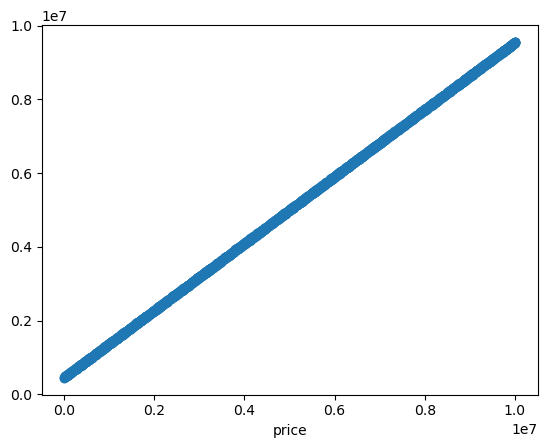

In [18]:
import seaborn as sns
sns.regplot(x=Y_test,y=ridge_pred)

In [19]:
##Score
from sklearn.metrics import r2_score
score = r2_score(ridge_pred,Y_test)
score

0.9899239707392127